In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "drive/MyDrive/aa"
%ls
%pwd

/content/drive/MyDrive/aa
curva.txt


'/content/drive/MyDrive/aa'

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import random

**1) Um exemplo simples de ajustamento**

Lê o ficheiro 'curva.txt' e transforma x e y em colunas.


In [5]:
mat = np.loadtxt('curva.txt')
xs = mat[:,:1]
ys = mat[:,1:]

Primeiro apagamos possíveis modelos anteriores existentes.

In [6]:
keras.backend.clear_session()

De seguida, criamos um novo modelo sequencial, ao qual, acrescentamos uma camada com um neurónio de activação sigmóide.

In [7]:
model = keras.Sequential()
model.add(layers.Dense(1, activation='sigmoid'))

Criamos depois o otimizador, neste caso Stochastic Gradient Descent (SGD), e indicamos a taxa/ritmo de aprendizagem (learning rate) e o momento (momentum).

In [8]:
opt = keras.optimizers.SGD(momentum = 0.9,learning_rate = 0.05)
model.compile(optimizer=opt,loss='mse')

Finalmente, treinamos o modelo, dando para isso os valores de entrada, correspondentes valores de saída, número de épocas e tamanho do batch.

In [9]:
model.fit(xs,ys,epochs=200, batch_size=16)

Epoch 1/200
13/13 [==============================] - 0s 2ms/step - loss: 1.8742
Epoch 2/200
13/13 [==============================] - 0s 1ms/step - loss: 1.8119
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 1.7722
Epoch 4/200
13/13 [==============================] - 0s 1ms/step - loss: 1.7358
Epoch 5/200
13/13 [==============================] - 0s 1ms/step - loss: 1.6999
Epoch 6/200
13/13 [==============================] - 0s 1ms/step - loss: 1.6699
Epoch 7/200
13/13 [==============================] - 0s 1ms/step - loss: 1.6363
Epoch 8/200
13/13 [==============================] - 0s 1ms/step - loss: 1.6097
Epoch 9/200
13/13 [==============================] - 0s 1ms/step - loss: 1.5872
Epoch 10/200
13/13 [==============================] - 0s 1ms/step - loss: 1.5643
Epoch 11/200
13/13 [==============================] - 0s 1ms/step - loss: 1.5514
Epoch 12/200
13/13 [==============================] - 0s 2ms/step - loss: 1.5273
Epoch 13/200
13/13 [=================

Depois de o modelo estar treinado, pode visualizar o ajuste do modelo aos dados de treino.

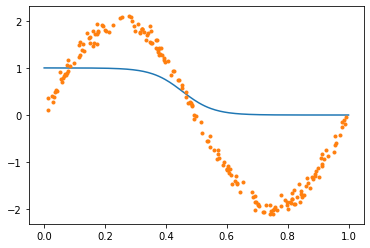

In [10]:
x = np.linspace(0,1,200).reshape((-1,1))
y = model.predict(x)
plt.plot(x,y)
plt.plot(xs,ys,'.')

A ativação sigmóide faz com que o valor de saída do modelo varie apenas entre 0 e 1, não se ajustando por isso bem à curva. 

**Alteremos para ativação linear.**

In [11]:
keras.backend.clear_session()
model = keras.Sequential()
model.add(layers.Dense(1, activation='linear',name='layer_1'))
opt = keras.optimizers.SGD(momentum = 0.9,learning_rate = 0.05)
model.compile(optimizer=opt,loss='mse')
model.fit(xs,ys,epochs=200, batch_size=16)

Epoch 1/200
13/13 [==============================] - 0s 1ms/step - loss: 2.1219
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 1.0417
Epoch 3/200
13/13 [==============================] - 0s 1ms/step - loss: 0.8401
Epoch 4/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7598
Epoch 5/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7254
Epoch 6/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7237
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 0.7237
Epoch 8/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7423
Epoch 9/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7318
Epoch 10/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7214
Epoch 11/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7483
Epoch 12/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7158
Epoch 13/200
13/13 [=================

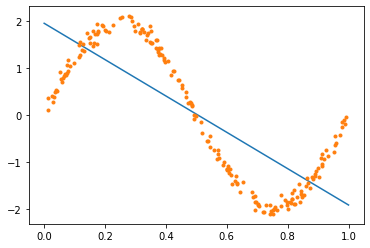

In [12]:
x = np.linspace(0,1,200).reshape((-1,1))
y = model.predict(x)
plt.plot(x,y)
plt.plot(xs,ys,'.')

Ao mudarmos o neurónio de activação **Sigmóide** para **Linear** houve um melhoramento no ajustamento. 
Houve também um decréscimo significativo no erro.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Adicionemos ao modelo anterior uma segunda camada com activação linear(activation='linear') e com um neurónio.


In [14]:
model.add(layers.Dense(1,activation='linear',name='layer_2'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
layer_2 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


Treinemos a rede de novo.

In [15]:
model.compile(optimizer=opt,loss='mse')
model.fit(xs,ys,epochs=200,batch_size=16)

Epoch 1/200
13/13 [==============================] - 0s 1ms/step - loss: 1.7354
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 1.0179
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 0.8200
Epoch 4/200
13/13 [==============================] - 0s 1ms/step - loss: 0.9665
Epoch 5/200
13/13 [==============================] - 0s 1ms/step - loss: 0.8420
Epoch 6/200
13/13 [==============================] - 0s 1ms/step - loss: 0.8336
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 0.7987
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 0.7630
Epoch 9/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7915
Epoch 10/200
13/13 [==============================] - 0s 1ms/step - loss: 0.8850
Epoch 11/200
13/13 [==============================] - 0s 2ms/step - loss: 0.7591
Epoch 12/200
13/13 [==============================] - 0s 2ms/step - loss: 0.8134
Epoch 13/200
13/13 [=================

Ao adicionarmos uma segunda camada com activação linear e com um neurónio houve um aumento no erro. Não houve melhorias.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
layer_2 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


Adicionemos uma camada escondida com um neurónio com ativação sigmóide.